In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

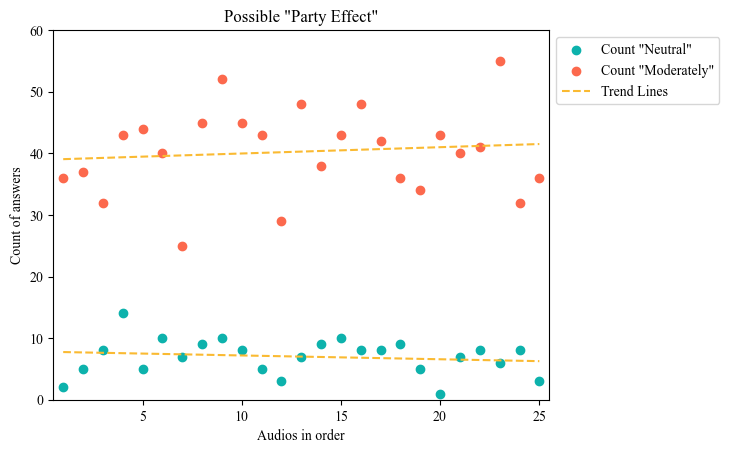

In [89]:
# Read the csv file into a DataFrame
df = pd.read_csv("../data/main_files/all_answers_listening_tests.csv", delimiter=";")

# Separate data into two sub-dataframes
general_df = pd.DataFrame(df[["order","overall"]])
reduced_general_df= pd.DataFrame(df["overall"])
emotions_df= pd.DataFrame(df[["order","pleasant","chaotic","vibrant","uneventful","calm","annoying","eventful","monotonous"]])
reduced_emotions_df= pd.DataFrame(df[["pleasant","chaotic","vibrant","uneventful","calm","annoying","eventful","monotonous"]])

# Count the number of occurrences of 3 in each row and store the result in a new column
general_df["count_of_3s"] = (reduced_general_df == 3).sum(axis=1)
emotions_df["count_of_3s"] = (reduced_emotions_df == 3).sum(axis=1)


# Group by the first column and sum the values in the second column for each group
general_df = general_df.groupby(general_df.iloc[:, 0]).sum()["count_of_3s"]
emotions_df = emotions_df.groupby(emotions_df.iloc[:, 0]).sum()["count_of_3s"]


# Calculate the trend line
x = np.arange(1,26,1)
y_general = general_df.values
slope, intercept, _, _, _ = linregress(x, y_general)
trend_line_general = slope * x + intercept
y_emotions = emotions_df.values
slope, intercept, _, _, _ = linregress(x, y_emotions)
trend_line_emotions = slope * x + intercept

# Display
plt.scatter(x,general_df.values, label='Count "Neutral"', color="#0db2ac")
plt.scatter(x,emotions_df.values, label='Count "Moderately"', color="#fc694d")
plt.plot(x, trend_line_general, color='#faba32', linestyle='--',label='Trend Lines')
plt.plot(x, trend_line_emotions, color='#faba32',linestyle='--')

# Add labels and legend
plt.xlabel('Audios in order')
plt.ylabel('Count of answers')
plt.xlim(0.5,25.5)
plt.ylim(0,60)
plt.title('Possible "Party Effect"')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.rcParams['font.family'] = 'sans-serif'
# Show plot
plt.show()
